## Лабораторна робота №5
з дисципліни "Нейронні мережі"
  
студента групи АнД-41
  
Морозова Ростислава

### Варіант № 9

## Завдання

1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:

1.1  CNN модель з лабораторної роботи 4;

1.2  Resnet модель;

1.3  Efficientnet модель (моделі 1.1-1.3 з використанням оптимізатора Adam);

1.4  Моделі 1.2,1.3 з використанням оптимізатора SGD.

2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.

3. Порівняти результати моделювання із використанням TensorBoard.

4. Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками. 

5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb.

6. Результати викласти у репозиторії GitHub (папка Lab5).

7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою).

#### Індекси за варіантом: 8, 38, 68

In [1]:
import matplotlib.pyplot as plt
import random
import datetime
import os
import time
import pathlib
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['bread_pudding' 'fish_and_chips' 'onion_rings']


In [108]:
train_datagen = ImageDataGenerator(rescale = 1/255., horizontal_flip = True,
                                   brightness_range = (0.2, 0.4), shear_range = 0.2, zoom_range = 0.2,  
                                   rotation_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1/255.)

 
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"


train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               seed=42,shuffle = 'False',
                                               color_mode="rgb",
                                               class_mode="categorical")

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


### 1. CNN модель з лабораторної роботи 4

In [36]:
tf.random.set_seed(42)
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2,  padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), 
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation="softmax")])


model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

CNN_model_time = time.time()
history_CNN = model_1.fit(train_data,epochs=5,validation_data=test_data)
time_CNN = time.time() - CNN_model_time
print("Час навчання:", round(time_CNN,2), " секунд" )

Epoch 1/5
24/24 [==============================] - 23s 925ms/step - loss: 1.0960 - accuracy: 0.3733 - val_loss: 1.1289 - val_accuracy: 0.3511
Epoch 2/5
24/24 [==============================] - 22s 899ms/step - loss: 1.0408 - accuracy: 0.4387 - val_loss: 1.0347 - val_accuracy: 0.5111
Epoch 3/5
24/24 [==============================] - 22s 892ms/step - loss: 0.9816 - accuracy: 0.5027 - val_loss: 1.2519 - val_accuracy: 0.4800
Epoch 4/5
24/24 [==============================] - 22s 894ms/step - loss: 0.9197 - accuracy: 0.5453 - val_loss: 1.2733 - val_accuracy: 0.5289
Epoch 5/5
24/24 [==============================] - 22s 908ms/step - loss: 0.9233 - accuracy: 0.5507 - val_loss: 1.0871 - val_accuracy: 0.5733
Час навчання: 111.78  секунд


In [37]:
def plot_accuracy(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot accuracy
    plt.figure(figsize = (9,5))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy per epoch',fontsize = 20)
    plt.xlabel('Epochs',fontsize = 20)
    plt.legend(prop={'size': 14})

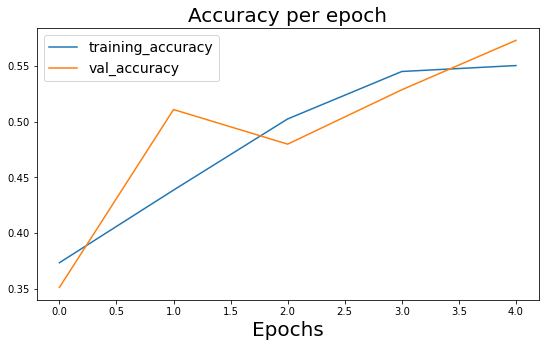

In [38]:
plot_accuracy(history_CNN)

In [39]:
true_y = []
for batch in range(len(test_data)):
    true_y += list(test_data[batch][-1].argmax(axis=1))

In [40]:
len(true_y)

225

In [41]:
print(true_y)

[2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2]


In [42]:
def forecast_and_conf_matrix(model,true_y):
    pred = model.predict(test_data).argmax(axis=1)
    conf_matrix=metrics.confusion_matrix(true_y,pred)    
    conf_matrix = pd.DataFrame(confusion_matrix(y_pred=pred, y_true=true_y), 
                            index=class_names, columns=class_names)
    print("Confusion matrix:")
    print(conf_matrix)   

In [43]:
forecast_and_conf_matrix(model_1,true_y)

Confusion matrix:
                apple_pie  deviled_eggs  lobster_bisque
apple_pie              35            21              19
deviled_eggs           20            46               9
lobster_bisque         13            14              48


 ### 2. Resnet модель 

#### 2.1 Adam optimizer

In [109]:
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [110]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
IMAGE_SHAPE=(224,224)

In [111]:
def create_BC_model(model_url):
    feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
    model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(3, activation='softmax', name='output_layer') # create our own output layer      
  ])

    return model

In [112]:
resnet_Adam_model = create_BC_model(resnet_url)

In [113]:
resnet_Adam_model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [114]:
resnet_Adam_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             42605504  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,611,651
Trainable params: 6,147
Non-trainable params: 42,605,504
_________________________________________________________________


In [115]:
tf.random.set_seed(42)

resnet_Adam_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

resnet_Adam_model_time = time.time()

resnet_Adam_model.fit(train_data, epochs=2, validation_data=test_data, 
                               callbacks=[create_tensorboard_callback(dir_name="Lab5.1", experiment_name="resnet(Adam)")])

time_resnet_Adam = time.time() - resnet_Adam_model_time

print("Час навчання:", round(time_resnet_Adam,2), " секунд" )

Saving TensorBoard log files to: Lab5.1/resnet(Adam)/20211125-140846
Epoch 1/2
24/24 [==============================] - 153s 6s/step - loss: 0.6624 - accuracy: 0.7133 - val_loss: 0.3607 - val_accuracy: 0.8356
Epoch 2/2
24/24 [==============================] - 130s 5s/step - loss: 0.2268 - accuracy: 0.9200 - val_loss: 0.2478 - val_accuracy: 0.9067
Час навчання: 284.65  секунд


In [60]:
for layer in resnet_Adam_model.layers[-10:]:
    layer.trainable=True

In [61]:
resnet_Adam_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             42605504  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,611,651
Trainable params: 42,506,307
Non-trainable params: 105,344
_________________________________________________________________


In [116]:
# ймовірності
y_hat = resnet_Adam_model.predict(test_data)
print(y_hat)

[[1.61093543e-04 6.20866631e-05 9.99776781e-01]
 [1.01132309e-02 9.20346558e-01 6.95402399e-02]
 [3.71499103e-03 9.95242357e-01 1.04265881e-03]
 [2.77658980e-02 9.67865705e-01 4.36849892e-03]
 [2.57378127e-02 9.37312126e-01 3.69501002e-02]
 [5.09899855e-01 1.89885926e-02 4.71111566e-01]
 [6.44060274e-05 2.47814824e-05 9.99910831e-01]
 [2.11142406e-01 7.81001985e-01 7.85564259e-03]
 [9.45456564e-01 2.39300951e-02 3.06133274e-02]
 [9.24674422e-03 9.52106237e-01 3.86470929e-02]
 [2.52299596e-05 1.55394737e-05 9.99959230e-01]
 [5.57529628e-01 4.40697789e-01 1.77260616e-03]
 [1.36279661e-04 1.51232061e-05 9.99848604e-01]
 [5.85862733e-02 9.41006780e-01 4.06894600e-04]
 [4.97453094e-01 5.01315296e-01 1.23157469e-03]
 [9.95840073e-01 2.68936693e-03 1.47061120e-03]
 [3.65938693e-01 6.05986357e-01 2.80749686e-02]
 [2.22445669e-04 1.37045849e-04 9.99640465e-01]
 [5.43660205e-03 4.58932761e-03 9.89974082e-01]
 [3.60997319e-01 6.08383060e-01 3.06196660e-02]
 [3.93407739e-04 4.96540510e-04 9.991100

In [117]:
y_hat = y_hat.argmax(axis=1)
print(y_hat)

[2 1 1 1 1 0 2 1 0 1 2 0 2 1 1 0 1 2 2 1 2 2 1 1 2 2 1 2 1 2 1 1 0 2 2 2 0
 2 0 1 0 2 1 2 0 2 1 2 0 0 1 0 0 1 2 0 2 2 0 0 0 2 2 2 2 1 0 1 0 1 2 2 2 0
 2 2 2 2 1 2 2 0 0 0 2 0 0 0 1 1 2 1 1 1 1 1 0 2 1 0 0 0 1 2 0 2 0 2 1 2 1
 2 0 0 0 2 2 2 1 1 0 1 1 0 2 2 0 0 2 0 1 2 2 1 1 1 1 1 0 1 1 0 0 0 2 0 2 0
 0 0 0 1 1 2 2 1 1 2 0 2 1 0 2 0 1 1 1 2 1 0 1 1 0 1 0 0 1 2 2 1 0 1 1 2 1
 0 0 1 1 2 1 0 2 2 2 2 0 0 0 2 1 1 0 2 0 1 0 0 1 0 2 1 2 1 2 0 1 0 0 1 2 2
 2 1 1]


In [118]:
print(true_y)

[2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2]


In [119]:
forecast_and_conf_matrix(resnet_Adam_model,true_y)

Confusion matrix:
                apple_pie  deviled_eggs  lobster_bisque
apple_pie              23            20              32
deviled_eggs           32            27              16
lobster_bisque         16            31              28


### 2.2 SGD optimizer

In [66]:
resnet_SGD_model = create_BC_model(resnet_url)

In [67]:
tf.random.set_seed(42)

resnet_SGD_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

resnet_SGD_model_time = time.time()

resnet_SGD_model.fit(train_data, epochs=2, validation_data=test_data, 
                               callbacks=[create_tensorboard_callback(dir_name="Lab5.1", experiment_name="resnet(SGD)")])

time_resnet_SGD = time.time() - resnet_SGD_model_time

print("Час навчання:", round(time_resnet_SGD,2), " секунд" )

Saving TensorBoard log files to: Lab5.1/resnet(SGD)/20211125-124457
Epoch 1/2
24/24 [==============================] - 88s 3s/step - loss: 0.6228 - accuracy: 0.7387 - val_loss: 0.2763 - val_accuracy: 0.8800
Epoch 2/2
24/24 [==============================] - 70s 3s/step - loss: 0.2315 - accuracy: 0.9227 - val_loss: 0.2478 - val_accuracy: 0.9156
Час навчання: 158.65  секунд


In [68]:
forecast_and_conf_matrix(resnet_SGD_model,true_y)

Confusion matrix:
                apple_pie  deviled_eggs  lobster_bisque
apple_pie              26            22              27
deviled_eggs           29            24              22
lobster_bisque         32            18              25


#### 2.3 Fine-tuned model

In [69]:
resnet_ft=tf.keras.applications.ResNet101(include_top=False)
resnet_ft.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")


x=resnet_ft(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)


model_resnet_ft=tf.keras.Model(inputs,outputs)


In [70]:
model_resnet_ft.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [71]:
history_resnet_ft =  model_resnet_ft.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=test_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 99s 4s/step - loss: 1.1483 - accuracy: 0.3080 - val_loss: 1.1267 - val_accuracy: 0.3289
Epoch 2/2
24/24 [==============================] - 90s 4s/step - loss: 1.1137 - accuracy: 0.3293 - val_loss: 1.1108 - val_accuracy: 0.3467


In [72]:
model_resnet_ft.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 gap_layer (GlobalAveragePoo  (None, 2048)             0         
 ling2D)                                                         
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


In [73]:
for layer in resnet_ft.layers[-10:]:
    layer.trainable=True

In [74]:
model_resnet_ft.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [75]:
model_resnet_ft.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 gap_layer (GlobalAveragePoo  (None, 2048)             0         
 ling2D)                                                         
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


### 3. Efficientnet model

#### 3.1 Adam optimizer

In [81]:
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [82]:
efficientnet_Adam_model = create_BC_model(efficientnet_url)

In [83]:
efficientnet_Adam_model.compile()

In [84]:
efficientnet_Adam_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,407
Trainable params: 3,843
Non-trainable params: 4,049,564
_________________________________________________________________


In [85]:
tf.random.set_seed(42)

efficientnet_Adam_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

efficientnet_Adam_model_time = time.time()

efficientnet_Adam_model.fit(train_data, epochs=2, validation_data=test_data, 
                               callbacks=[create_tensorboard_callback(dir_name="Lab5.1", experiment_name="efficientnet(Adam)")])

time_efficientnet_Adam = time.time() - efficientnet_Adam_model_time

print("Час навчання:", round(time_efficientnet_Adam,2), " секунд" )

Saving TensorBoard log files to: Lab5.1/efficientnet(Adam)/20211125-125758
Epoch 1/2
24/24 [==============================] - 53s 1s/step - loss: 0.6583 - accuracy: 0.7893 - val_loss: 0.3903 - val_accuracy: 0.9200
Epoch 2/2
24/24 [==============================] - 30s 1s/step - loss: 0.2825 - accuracy: 0.9413 - val_loss: 0.2630 - val_accuracy: 0.9422
Час навчання: 82.94  секунд


In [86]:
test_data.reset()

In [90]:
y_hat = efficientnet_Adam_model.predict(test_data)
y_hat = y_hat.argmax(axis = 1)
print(y_hat)

[1 2 2 0 1 1 1 0 1 2 0 2 2 1 2 1 0 0 0 2 1 2 2 2 1 1 1 1 1 2 2 0 0 0 2 1 0
 0 0 0 2 1 0 1 2 2 1 1 1 0 2 1 2 1 0 0 1 2 0 0 1 2 2 1 0 2 1 2 2 1 2 1 1 0
 2 0 2 2 2 0 0 1 2 1 0 0 1 2 0 0 0 1 1 0 2 2 1 1 0 2 0 1 2 0 1 0 1 2 2 1 0
 0 0 0 1 1 2 2 2 0 0 0 1 1 2 2 2 0 0 0 0 2 2 2 2 0 1 0 1 0 2 1 2 0 1 2 1 1
 2 0 0 0 1 2 0 0 0 0 2 0 0 0 0 2 2 2 1 2 2 1 2 0 0 1 1 1 0 1 2 0 1 2 1 1 2
 2 2 0 1 0 2 2 1 2 0 0 1 2 2 2 1 2 0 1 0 0 1 2 0 0 1 0 1 0 1 2 0 2 1 0 0 1
 0 1 1]


In [91]:
print(true_y)

[2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2]


In [93]:
forecast_and_conf_matrix(efficientnet_Adam_model,true_y)

Confusion matrix:
                apple_pie  deviled_eggs  lobster_bisque
apple_pie              34            20              21
deviled_eggs           20            29              26
lobster_bisque         25            23              27


In [94]:
efficientnet_Adam_model.evaluate(test_data)

8/8 [==============================] - 7s 806ms/step - loss: 0.2630 - accuracy: 0.9422


[0.2629548907279968, 0.9422222375869751]

In [95]:
for layer in efficientnet_Adam_model.layers[-10:]:
    layer.trainable=True

In [96]:
efficientnet_Adam_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [97]:
efficientnet_Adam_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,407
Trainable params: 4,011,391
Non-trainable params: 42,016
_________________________________________________________________


#### 3.2 SGD

In [98]:
efficientnet_SGD_model = create_BC_model(efficientnet_url)

In [99]:
tf.random.set_seed(42)

efficientnet_SGD_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

efficientnet_SGD_model_time = time.time()

efficientnet_SGD_model.fit(train_data, epochs=2, validation_data=test_data, 
                               callbacks=[create_tensorboard_callback(dir_name="Lab5.1", experiment_name="efficientnet(SGD)")])

time_efficientnet_SGD = time.time() - efficientnet_SGD_model_time

print("Час навчання:", round(time_efficientnet_SGD,2), " секунд" )

Saving TensorBoard log files to: Lab5.1/efficientnet(SGD)/20211125-130434
Epoch 1/2
24/24 [==============================] - 55s 1s/step - loss: 0.7955 - accuracy: 0.7147 - val_loss: 0.5828 - val_accuracy: 0.8489
Epoch 2/2
24/24 [==============================] - 30s 1s/step - loss: 0.4892 - accuracy: 0.8867 - val_loss: 0.4384 - val_accuracy: 0.8889
Час навчання: 85.96  секунд


In [100]:
forecast_and_conf_matrix(efficientnet_SGD_model,true_y)

Confusion matrix:
                apple_pie  deviled_eggs  lobster_bisque
apple_pie              21            29              25
deviled_eggs           27            18              30
lobster_bisque         24            29              22
